# Project: Investigate a Dataset (TMDb movie data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

Potential Questions:
1. What are the most produced movies genres in every decade ?
2. What kinds of properties are associated with movies that have high revenues?
3. What is the top revenue movie?
4. What is the average vote of top revinued movies?
5. What is the relation between revinue and rating?
6. What is the relation between budget and rating?
7. What is the relation between budget and revenue?
8. How movie production industries expanded in 21th Century?
9. What is the highest rating movie?
10. What are the top producing directors?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The data contains not relevent columns that need to be removed

### Data Cleaning (Removing not relevent columns and fixing missing values)

In [3]:
df.drop(['homepage', 'tagline', 'overview','release_date','vote_count','budget_adj','revenue_adj', 'keywords'],axis=1, inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


In [4]:
# checking duplicated raws
df.duplicated().sum()

1

In [5]:
# remove duplicated raws
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   director              10821 non-null  object 
 8   runtime               10865 non-null  int64  
 9   genres                10842 non-null  object 
 10  production_companies  9835 non-null   object 
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


dtypes of the data are correct: no need to change anything

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


In [8]:
# check missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_average               0
release_year               0
dtype: int64

* all missing values are in the categorical columns, so we can fill them with 'unknown'

In [9]:
df[['genres','cast', 'director', 'production_companies', 'imdb_id']] = df[['genres','cast', 'director', 'production_companies', 'imdb_id']].fillna('unknown')

In [10]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_average            0
release_year            0
dtype: int64

* save the dataframe after cleaning in a new csv file

In [11]:
df.to_csv('tmdb-movies-clean.csv', index=False)

In [12]:
df = pd.read_csv('tmdb-movies-clean.csv')

In [13]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


* check presence of zeros 

In [14]:
df[['budget', 'runtime', 'revenue', 'vote_average']].isin([0]).sum(axis=0).sort_values(ascending=False)

revenue         6016
budget          5696
runtime           31
vote_average       0
dtype: int64

* we need to take care of high count of zeros in revenue and budget in our analysis as they may be missing values

### Data limitations
1. A lot of irrelevant columns
2. A lot of missing values in both categorical and numerical columns
3. A lot of zeros need to be specified whether they are really zeros or missing values

## Exploratory Data Analysis

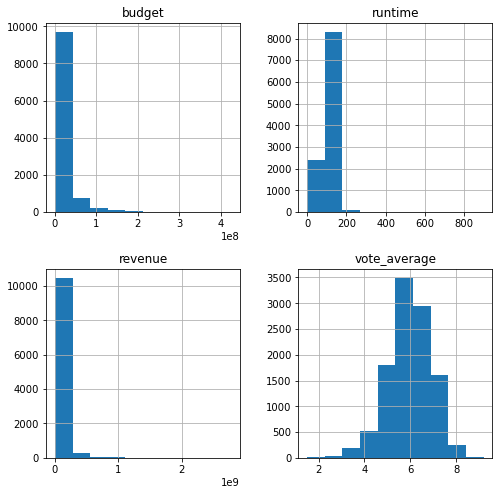

In [15]:
df[['budget', 'runtime', 'revenue', 'vote_average']].hist(figsize=(8, 8));

### Research Question 1 (What are the most produced movies genres in every decade ?)

Creat a new column to include the decade

In [16]:
bin_edges = [1960 ,1970 ,1980 ,1990 ,2000, 2010, 2015]

In [17]:
bin_names = ['sixties' ,'seventies' ,'eighties' ,'nineties', '2000s', '2010s']

In [18]:
df['decade'] = pd.cut(df['release_year'], bin_edges, labels=bin_names, include_lowest=True)

In [19]:
df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,decade
10860,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,7.4,1966,sixties
10861,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,5.7,1966,sixties
10862,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,6.5,1966,sixties
10863,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,5.4,1966,sixties
10864,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,1.5,1966,sixties


In [20]:
# creat a new dataframe that contains split genres in multiple raws to 
df_genres = df.assign(genres=df['genres'].str.split('|')).explode('genres')

In [21]:
def mybar(df_genres, title):
    ''' 
    This funtion to plot bar diagram with unified shape
    inputs: dataframe, title
    
    '''
    df_genres.plot(kind='bar',
        figsize=[14,8], 
           rot=0, 
           title='Top Genres Produced in the {}'.format(title))

### sixties:

In [22]:
df_sixties = df.query('decade == "sixties"')
df_sixties.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,decade
10860,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,7.4,1966,sixties
10861,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,5.7,1966,sixties
10862,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,6.5,1966,sixties
10863,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,5.4,1966,sixties
10864,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,1.5,1966,sixties


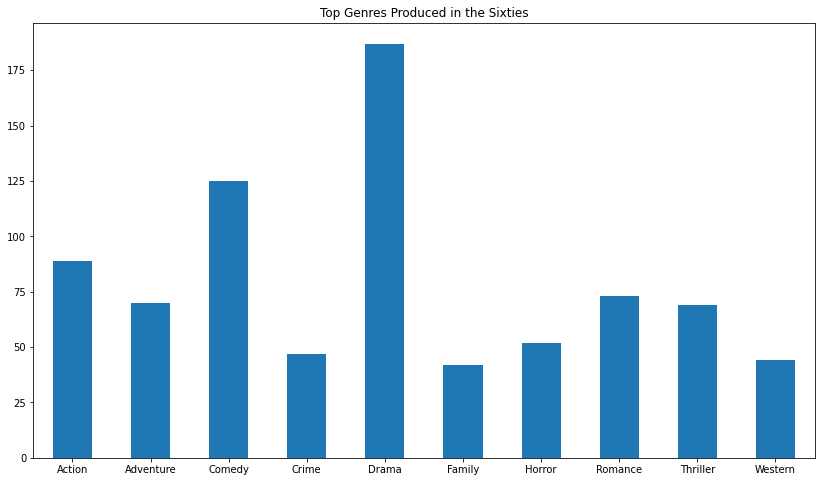

In [23]:
mybar(df_genres.query('decade == "sixties"').genres.value_counts().sort_values(ascending= False).head(10).sort_index(),'Sixties')

Drama is the top genres in sixties movies

### seventies

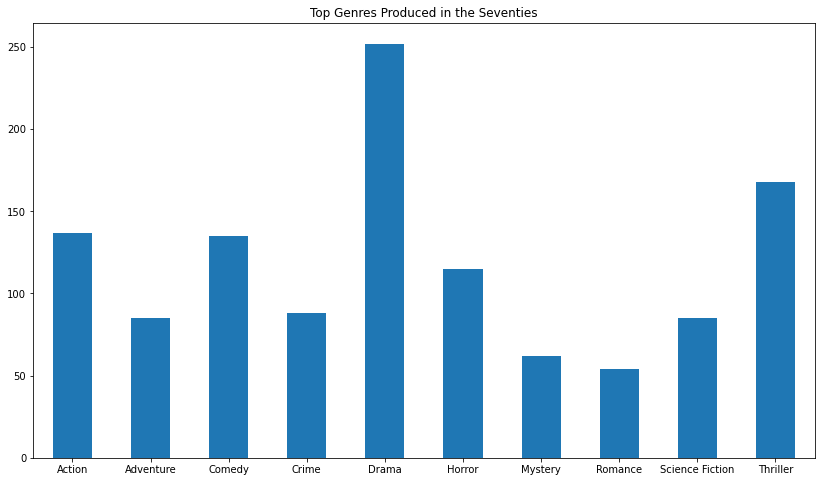

In [24]:
mybar(df_genres.query('decade == "seventies"').genres.value_counts().sort_values(ascending= False).head(10).sort_index(),'Seventies')

Drama is the top genres in seventies movies

### eighties

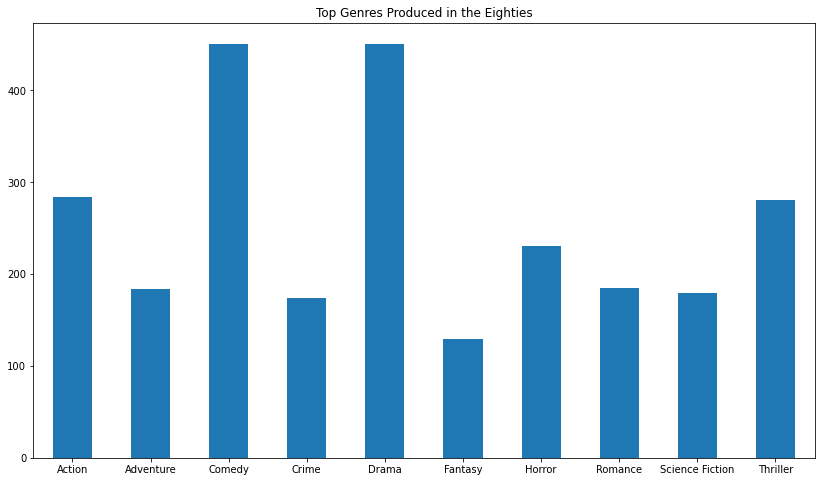

In [25]:
mybar(df_genres.query('decade == "eighties"').genres.value_counts().sort_values(ascending= False).head(10).sort_index(),'Eighties')

Drama and Comedy are the top genres in eighties movies

### nineties

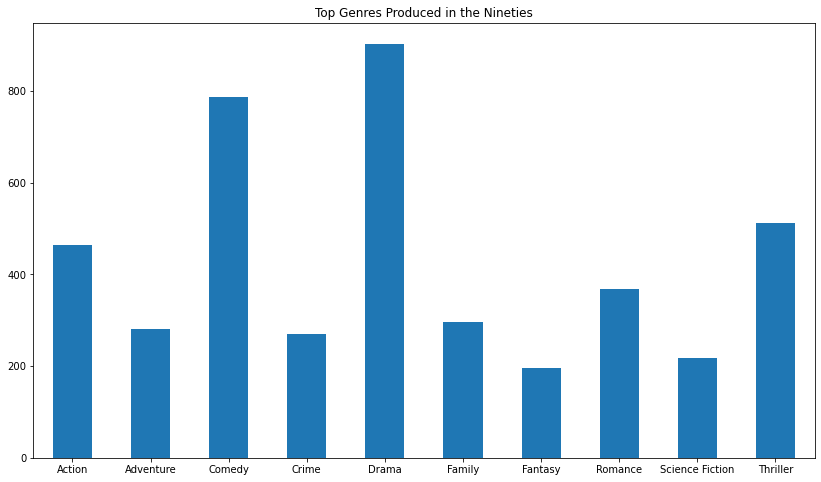

In [26]:
mybar(df_genres.query('decade == "nineties"').genres.value_counts().sort_values(ascending= False).head(10).sort_index(),'Nineties')

Drama then Comedy are the top genres in nineties movies

### 2000s

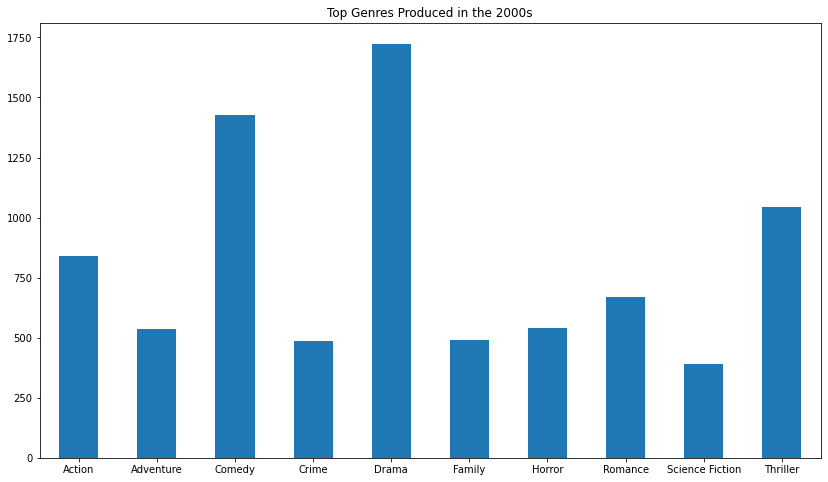

In [27]:
mybar(df_genres.query('decade == "2000s"').genres.value_counts().sort_values(ascending= False).head(10).sort_index(),'2000s')

Drama is the top genres in 2000s movies

### 2010s

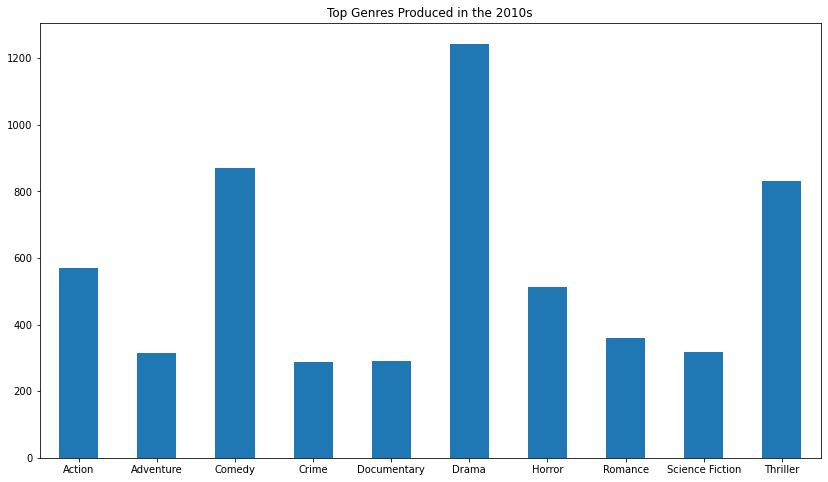

In [28]:
mybar(df_genres.query('decade == "2010s"').genres.value_counts().sort_values(ascending= False).head(10).sort_index(),'2010s')

Drama is the top genres in 2010s movies

## Conclusion:
Across all decades Drama movies are the most genres produced

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [29]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,decade
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,2010s
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,2010s


In [30]:
revenue_desc = df.query('revenue != 0').revenue.describe()
revenue_desc

count    4.849000e+03
mean     8.923886e+07
std      1.620801e+08
min      2.000000e+00
25%      7.732325e+06
50%      3.185308e+07
75%      9.996575e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [31]:
top_25_rev = revenue_desc['75%']

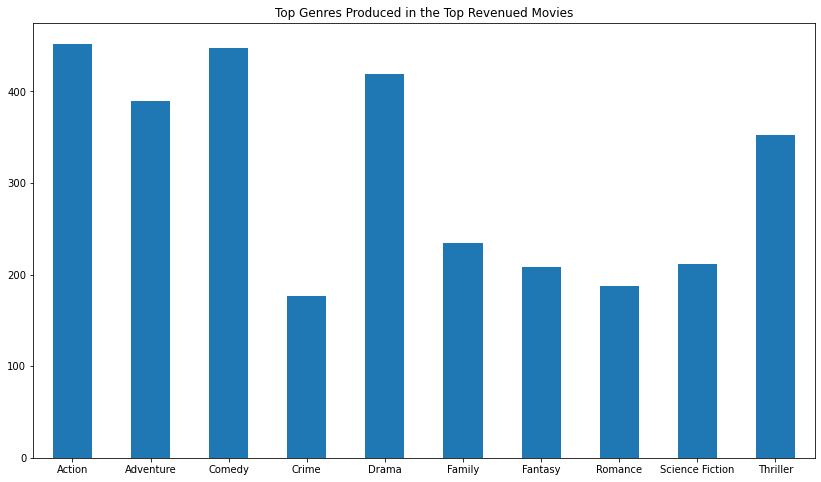

In [32]:
mybar(df_genres.query('revenue >= @top_25_rev').genres.value_counts().sort_values(ascending= False).head(10).sort_index(),'Top Revenued Movies')

Action, Comedy and Drama movies have more revenues than other movies

### Research Question 3: What is the top revenue movie?

In [33]:
max_rev = df['revenue'].max()
df.query('revenue == @max_rev')

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,decade
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,2000s


Avatar is the most revenued movie

### Research Question 4: What is the average vote of top revinued movies?

In [34]:
df.query('revenue >= @top_25_rev').vote_average.mean()

6.373866446826051

Average vote of top revinued movies is 6.37

### Research Question 5: What is the relation between revinue and rating?

In [35]:
def my_scatter(df, x_var, y_var):
    ''' 
    This funtion to plot scatter diagram with unified shape
    inputs: dataframe, x axis, and y axis
    
    '''
    df.plot(kind='scatter',
           x=x_var,
           y=y_var,
           figsize=[10,8])
    plt.title('Releation between {} and {}'.format(x_var, y_var).title())
    plt.xlabel('{}'.format(x_var).title())
    plt.ylabel('{}'.format(y_var).title());

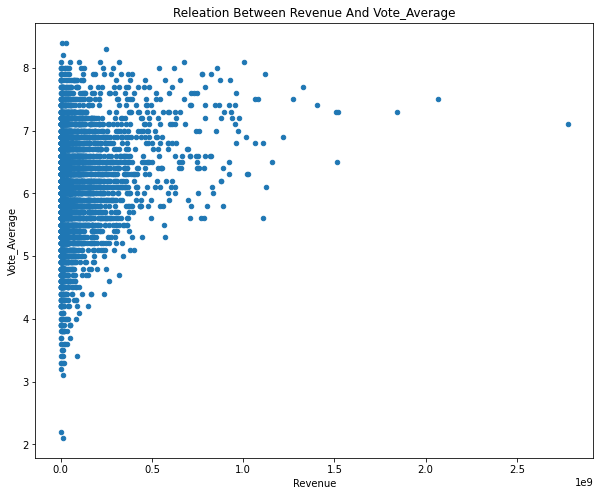

In [36]:
my_scatter(df.query('revenue != 0'),'revenue', 'vote_average')


positive correlation between revenue and rating

### Research Question 6: What is the relation between budget and rating?

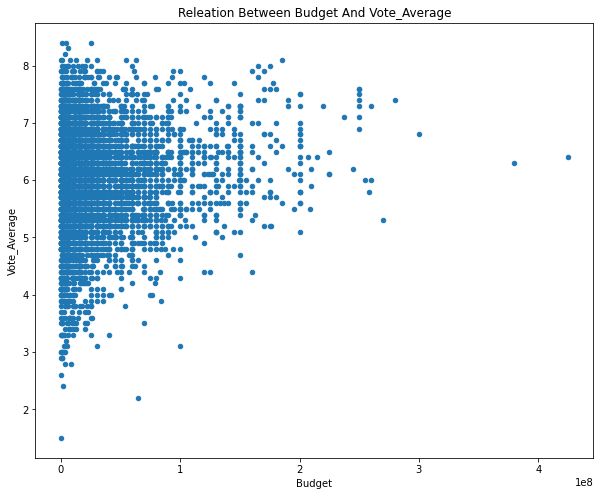

In [37]:
my_scatter(df.query('budget != 0'),'budget', 'vote_average')

positive correlation between budget and rating

### Research Question 7: What is the relation between budget and revenue?

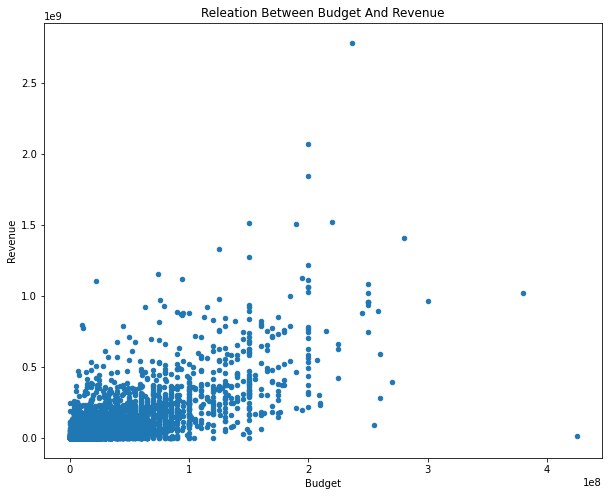

In [38]:
my_scatter(df.query('budget != 0'),'budget', 'revenue')

positive correlation between budget and revenue

### Research Question 8: How movie production industries expanded in 21th Century?

In [39]:
df_release_year = df.release_year.value_counts().sort_index(ascending=True)

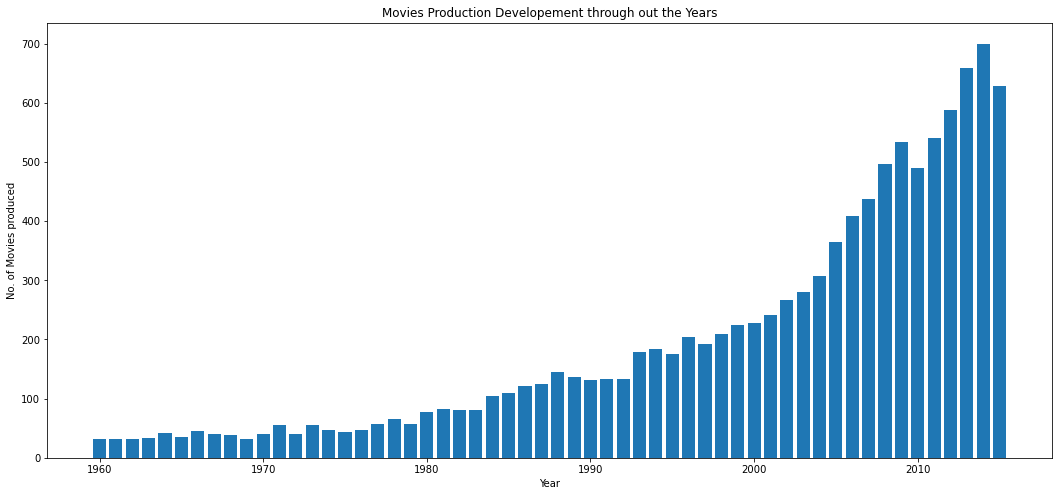

In [40]:
plt.subplots(figsize=(18,8))
plt.bar(df_release_year.index, df_release_year)
plt.title('Movies Production Developement through out the Years')
plt.xlabel('Year')
plt.ylabel('No. of Movies produced');

Movie production industries expanded drastically in the  21th Century

### Research Question 9: What is the highest rating movie?

In [41]:
max_vote = df['vote_average'].max()
df.query('vote_average == @max_vote')

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,decade
3893,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,unknown,9.2,2011,2010s


The Story of Film: An Odyssey is the highest rating movie

### Research Question 10: What are the top producing directors?

In [42]:
# check if there are movies with multiple directors
'|' in df.director.to_string()

True

In [43]:
df_director = df.assign(director=df['director'].str.split('|')).explode('director')
df_director.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,decade
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,2010s
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,2010s
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,2010s
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,2010s
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,2010s


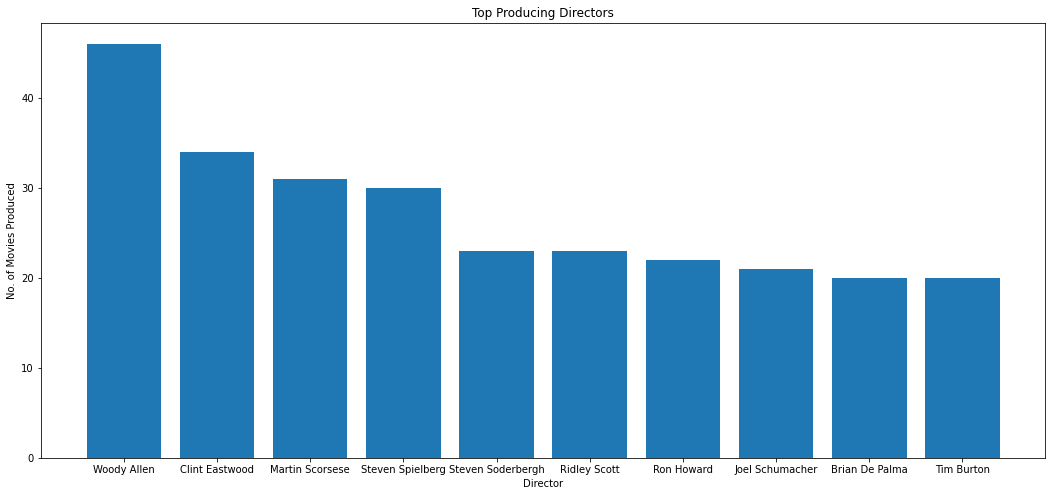

In [44]:
top_direcs = df_director.query('director != "unknown"').director.value_counts().sort_values(ascending=False).head(10)
plt.subplots(figsize=(18,8))
plt.bar(top_direcs.index, top_direcs)
plt.title('Top Producing Directors');
plt.xlabel('Director')
plt.ylabel('No. of Movies Produced');

Woody Allen is the top producing director

<a id='conclusions'></a>
## Conclusions

> **limitations**: 
1. A lot of irrelevant columns
2. A lot of missing values in both categorical and numerical columns
3. a lot of zeros need to be specified whether they are really zeros or missing values

## Insights
### 1.	What are the most produced movies genres in every decade?
Across all decades Drama movies are the most genres produced
### 2.	What kinds of properties are associated with movies that have high revenues?
Action, Comedy and Drama movies have more revenues than other movies
### 3.	What is the top revenue movie?
Avatar is the most revenued movie
### 4.	What is the average vote of top revenued movies?
Average vote of top revenued movies is 6.37
### 5.	What is the relation between revenued and rating?
Positive correlation between revenue and rating
### 6.	What is the relation between budget and rating?
Positive correlation between revenue and rating
### 7.	What is the relation between budget and revenue?
Positive correlation between budget and revenue
### 8.	How movie production industries expanded in 21th Century?
Movie production industries expanded drastically in the 21th Century
### 9.	What is the highest rating movie?
The Story of Film: An Odyssey is the highest rating movie
### 10.	What are the top producing directors?
Woody Allen is the top producing director
